In [1]:
import os
import numpy as np
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ver = 4
n_var = 25
dirpath = '/Users/xli77/Dropbox (GaTech)/MIVA/output'
phenotype_path = os.path.join(dirpath, f'ukb_2907sub_{n_var}var.mat')
phenotype_key = np.squeeze(sio.loadmat(phenotype_path)['phenotype_key'])

In [3]:
p_corrected = sio.loadmat(f'/Users/xli77/Dropbox (GaTech)/MISA-pytorch/figures/SIVA/v{ver}/phenotype_map_{n_var}var/p_corrected.mat')['p_corrected']
rejected = sio.loadmat(f'/Users/xli77/Dropbox (GaTech)/MISA-pytorch/figures/SIVA/v{ver}/phenotype_map_{n_var}var/rejected.mat')['rejected']
pearsonr = sio.loadmat(f'/Users/xli77/Dropbox (GaTech)/MISA-pytorch/figures/SIVA/v{ver}/phenotype_map_{n_var}var/pearsonr.mat')['r']

rejected_count_pos = np.sum(rejected * (pearsonr > 0), axis=0)
rejected_count_neg = np.sum(rejected * (pearsonr < 0), axis=0)
rejected_count = np.sum(rejected, axis=0)

ind_zero = np.where(np.sum(rejected_count, axis=0) == 0)[0]
print(phenotype_key[3][0], phenotype_key[12][0], phenotype_key[17][0])
rej = np.sum(rejected[:,4,[3,12,17]], axis=1)
print(f"number of overlapping voxels: {len(np.where(rej==3)[0])}")

time_spent_watching_television_tv_f1070_2_0 mean_time_to_correctly_identify_matches_f20023_2_0 PE PC1
number of overlapping voxels: 14431


In [4]:
ylabels = []
count = 1
for i in range(len(phenotype_key)):
    pn = phenotype_key[i][0]
    ylabels.append(f'{i+1} ' + pn.replace('_', ' '))
print(ylabels) #4,13,18
xlabels = [f"SVD{i}" for i in range(1,6)] + [f"Cross-modal subspace{i} M1" for i in range(1,6)] + ["Unimodal subspace1 M1", "Unimodal subspace2 M1", "Unimodal subspace1 M2", "Unimodal subspace2 M2"]

['1 number of incorrect matches in round f399 2 2', '2 time to complete round f400 2 2', '3 length of time at current address f699 2 0', '4 time spent watching television tv f1070 2 0', '5 time spent using computer f1080 2 0', '6 sleep duration f1160 2 0', '7 bread intake f1438 2 0', '8 tea intake f1488 2 0', '9 coffee intake f1498 2 0', '10 alcohol intake frequency f1558 2 0', '11 longest period of depression f4609 2 0', '12 fluid intelligence score f20016 2 0', '13 mean time to correctly identify matches f20023 2 0', '14 number of fluid intelligence questions attempted within time limit f20128 2 0', '15 inverse log duration screen displayed 2 0', '16 inverse log number of attempts 2 0', '17 fluid intelligence interaction 2 0', '18 PE PC1', '19 PE PC2', '20 PE PC3', '21 PE PC4', '22 PE PC5', '23 PE PC6', '24 PE PC7', '25 PE PC8']


In [5]:
xticklabels_nz = np.delete(ylabels, ind_zero)
rejected_count_posnz = np.delete(rejected_count_pos, ind_zero, axis=1)
rejected_count_negnz = np.delete(rejected_count_neg, ind_zero, axis=1)

In [6]:
ylabels_renamed = ['Time spent watching television',
 'Time spent using computer',
 'Sleep duration',
 'Fluid intelligence score',
 'Mean time to correctly identify matches',
 'Number of fluid intelligence questions attempted within time limit',
 'Fluid intelligence interaction',
 'Physical exercise principal component 1',
 'Physical exercise principal component 2',
 'Physical exercise principal component 3',
 'Physical exercise principal component 4',
 'Physical exercise principal component 5']

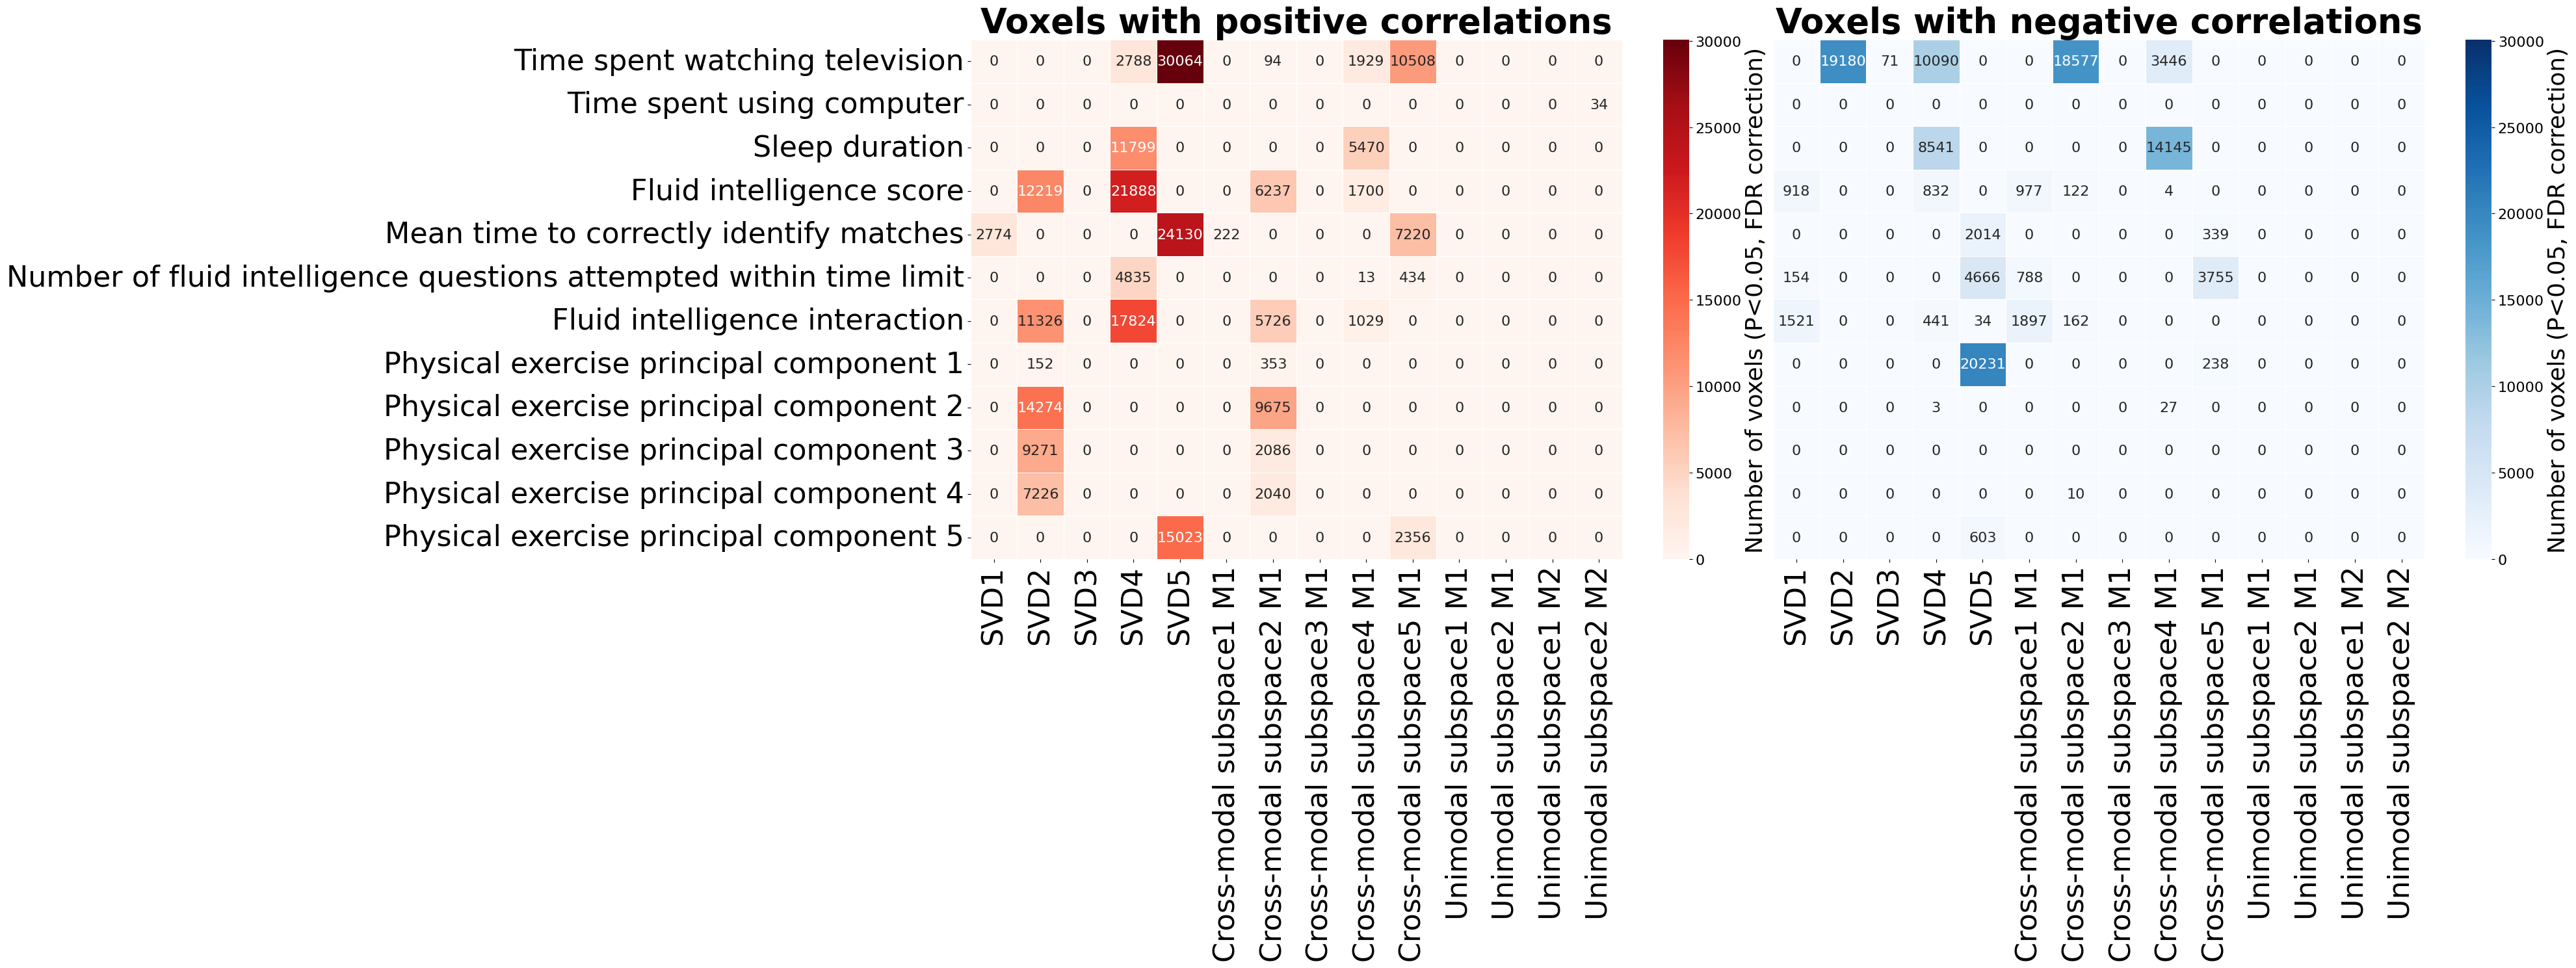

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(40,len(ylabels_renamed)*1.25))

yticks = np.arange(0.5, len(ylabels_renamed)+0.5, 1)
g1 = sns.heatmap(rejected_count_posnz.T, annot=True, annot_kws={"fontsize":16}, linewidths=.5, fmt=".0f", cmap="Reds", vmax=np.max(rejected_count), xticklabels=xlabels, yticklabels=ylabels_renamed, cbar_kws={"shrink": 1, 'label': 'Number of voxels (P<0.05, FDR correction)'}, ax=axes[0])
g1.set_title("Voxels with positive correlations", fontsize=38, fontweight='bold')
g1.set_yticks(yticks)
g1.set_yticklabels(g1.get_yticklabels(), rotation=0, fontsize=32)
g1.set_xticklabels(g1.get_xticklabels(), fontsize=32)
cbar1 = g1.collections[0].colorbar
cbar1.ax.tick_params(labelsize=16)
cbar1.set_label(label='Number of voxels (P<0.05, FDR correction)', fontsize=26)

g2 = sns.heatmap(rejected_count_negnz.T, annot=True, annot_kws={"fontsize":16}, linewidths=.5, fmt=".0f", cmap="Blues", vmax=np.max(rejected_count), xticklabels=xlabels, yticklabels=[], cbar_kws={"shrink": 1, 'label': 'Number of voxels (P<0.05, FDR correction)'}, ax=axes[1])
g2.set_title("Voxels with negative correlations", fontsize=38, fontweight='bold')
g2.set_xticklabels(g2.get_xticklabels(), fontsize=32)
cbar2 = g2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=16)
cbar2.set_label(label='Number of voxels (P<0.05, FDR correction)', fontsize=26)

plt.tight_layout()
plt.savefig(f"figures/heatmap_fdr_corrected_wsvd_{n_var}var.pdf", bbox_inches='tight')

In [8]:
ver_ = 5
p_corrected_ = sio.loadmat(f'/Users/xli77/Dropbox (GaTech)/MISA-pytorch/figures/SIVA/v{ver_}/phenotype_map_{n_var}var/p_corrected.mat')['p_corrected']
rejected_ = sio.loadmat(f'/Users/xli77/Dropbox (GaTech)/MISA-pytorch/figures/SIVA/v{ver_}/phenotype_map_{n_var}var/rejected.mat')['rejected']
pearsonr_ = sio.loadmat(f'/Users/xli77/Dropbox (GaTech)/MISA-pytorch/figures/SIVA/v{ver_}/phenotype_map_{n_var}var/pearsonr.mat')['r']

rejected_count_ = np.sum(rejected_, axis=0)
rejected_count_pos_ = np.sum(rejected_ * (pearsonr_ > 0), axis=0)
rejected_count_neg_ = np.sum(rejected_ * (pearsonr_ < 0), axis=0)
rejected_count_posnz_ = np.delete(rejected_count_pos_, ind_zero, axis=1)
rejected_count_negnz_ = np.delete(rejected_count_neg_, ind_zero, axis=1)

xlabels_ = []
for i in range(1,6):
    xlabels_.append(f"Cross-modal subspace{i} M1")
    xlabels_.append(f"Cross-modal subspace{i} M2")
xlabels_ += ["Unimodal subspace1 M1", "Unimodal subspace2 M1", "Unimodal subspace1 M2", "Unimodal subspace2 M2"]

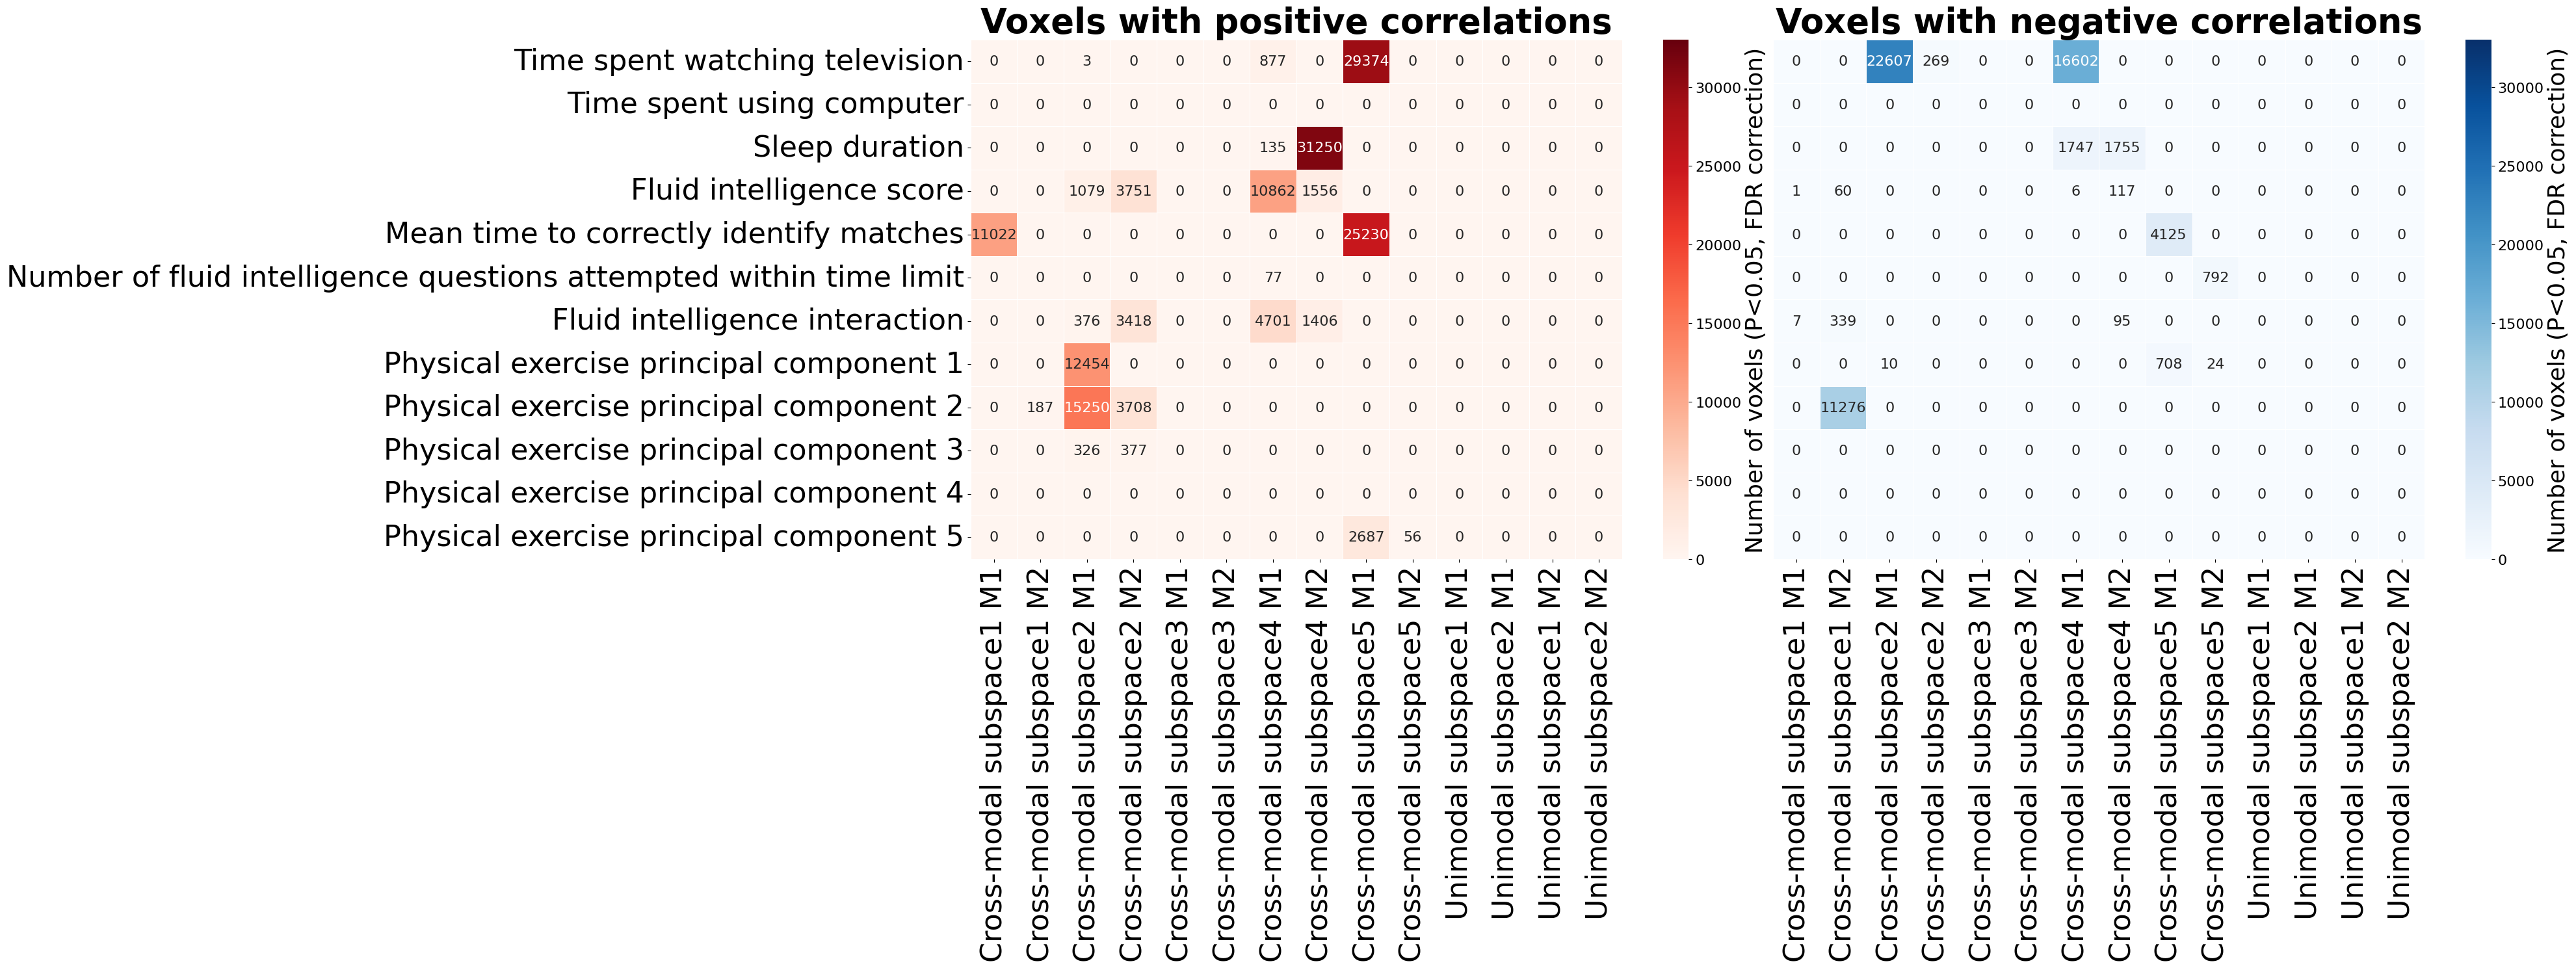

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(40,len(ylabels_renamed)*1.25))

yticks = np.arange(0.5, len(ylabels_renamed)+0.5, 1)
g1 = sns.heatmap(rejected_count_posnz_.T, annot=True, annot_kws={"fontsize":16}, linewidths=.5, fmt=".0f", cmap="Reds", vmax=np.max(rejected_count_), xticklabels=xlabels_, yticklabels=ylabels_renamed, cbar_kws={"shrink": 1, 'label': 'Number of voxels (P<0.05, FDR correction)'}, ax=axes[0])
g1.set_title("Voxels with positive correlations", fontsize=38, fontweight='bold')
g1.set_yticks(yticks)
g1.set_yticklabels(g1.get_yticklabels(), rotation=0, fontsize=32)
g1.set_xticklabels(g1.get_xticklabels(), fontsize=32)
cbar1 = g1.collections[0].colorbar
cbar1.ax.tick_params(labelsize=16)
cbar1.set_label(label='Number of voxels (P<0.05, FDR correction)', fontsize=26)

g2 = sns.heatmap(rejected_count_negnz_.T, annot=True, annot_kws={"fontsize":16}, linewidths=.5, fmt=".0f", cmap="Blues", vmax=np.max(rejected_count_), xticklabels=xlabels_, yticklabels=[], cbar_kws={"shrink": 1, 'label': 'Number of voxels (P<0.05, FDR correction)'}, ax=axes[1])
g2.set_title("Voxels with negative correlations", fontsize=38, fontweight='bold')
g2.set_xticklabels(g2.get_xticklabels(), fontsize=32)
cbar2 = g2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=16)
cbar2.set_label(label='Number of voxels (P<0.05, FDR correction)', fontsize=26)

plt.tight_layout()
plt.savefig(f"figures/heatmap_fdr_corrected_wosvd_{n_var}var.pdf", bbox_inches='tight')